# 1. Import packages and read data. Get data stats


In [41]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [2]:
data = pd.read_csv("Bank_Personal_Loan_Modelling.csv")
data.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [3]:
data.shape

(5000, 14)

In [4]:
data.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [5]:
data.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

# 2A. Unique values per column

In [6]:
data.nunique()

ID                    5000
Age                     45
Experience              47
Income                 162
ZIP Code               467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal Loan            2
Securities Account       2
CD Account               2
Online                   2
CreditCard               2
dtype: int64

# 2B. Count of People with Zero Mortgage

In [7]:
mortgage = data[data['Mortgage'] ==0]
mortgage['Mortgage'].count()

3462

# 2C. Count of People with Zero Credit Card Spending

In [8]:
creditSpending = data[data['CCAvg'] ==0]
creditSpending['CCAvg'].count()

106

# 2D. Value counts per categorical column

In [9]:
data.Education.value_counts()

1    2096
3    1501
2    1403
Name: Education, dtype: int64

In [10]:
data["Personal Loan"].value_counts()

0    4520
1     480
Name: Personal Loan, dtype: int64

In [11]:
data["Securities Account"].value_counts()

0    4478
1     522
Name: Securities Account, dtype: int64

In [12]:
data["CD Account"].value_counts()

0    4698
1     302
Name: CD Account, dtype: int64

In [13]:
data.Online.value_counts()

1    2984
0    2016
Name: Online, dtype: int64

In [14]:
data.CreditCard.value_counts()

0    3530
1    1470
Name: CreditCard, dtype: int64

# 2E. Univariate plotting
y = count, 
x= value

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10d0b8590>,
      dtype=object)

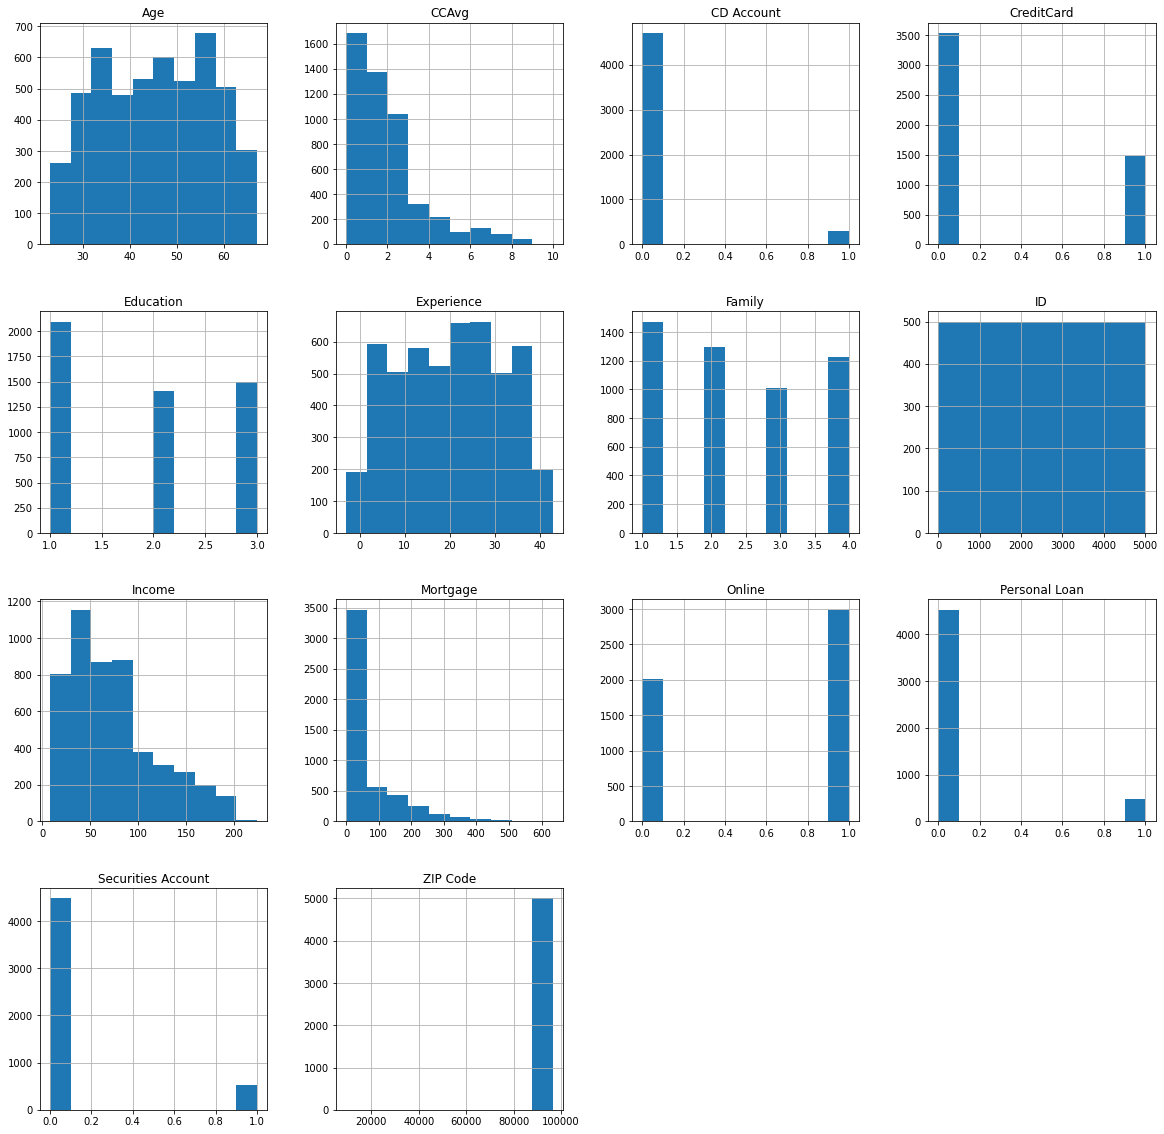

In [15]:
data.hist( figsize=[20,20], bins=10)

# 2E. Bivariate plotting

Let's first try a scatterplot for all columns except Zip Code and ID and see if we can see anything interesting.

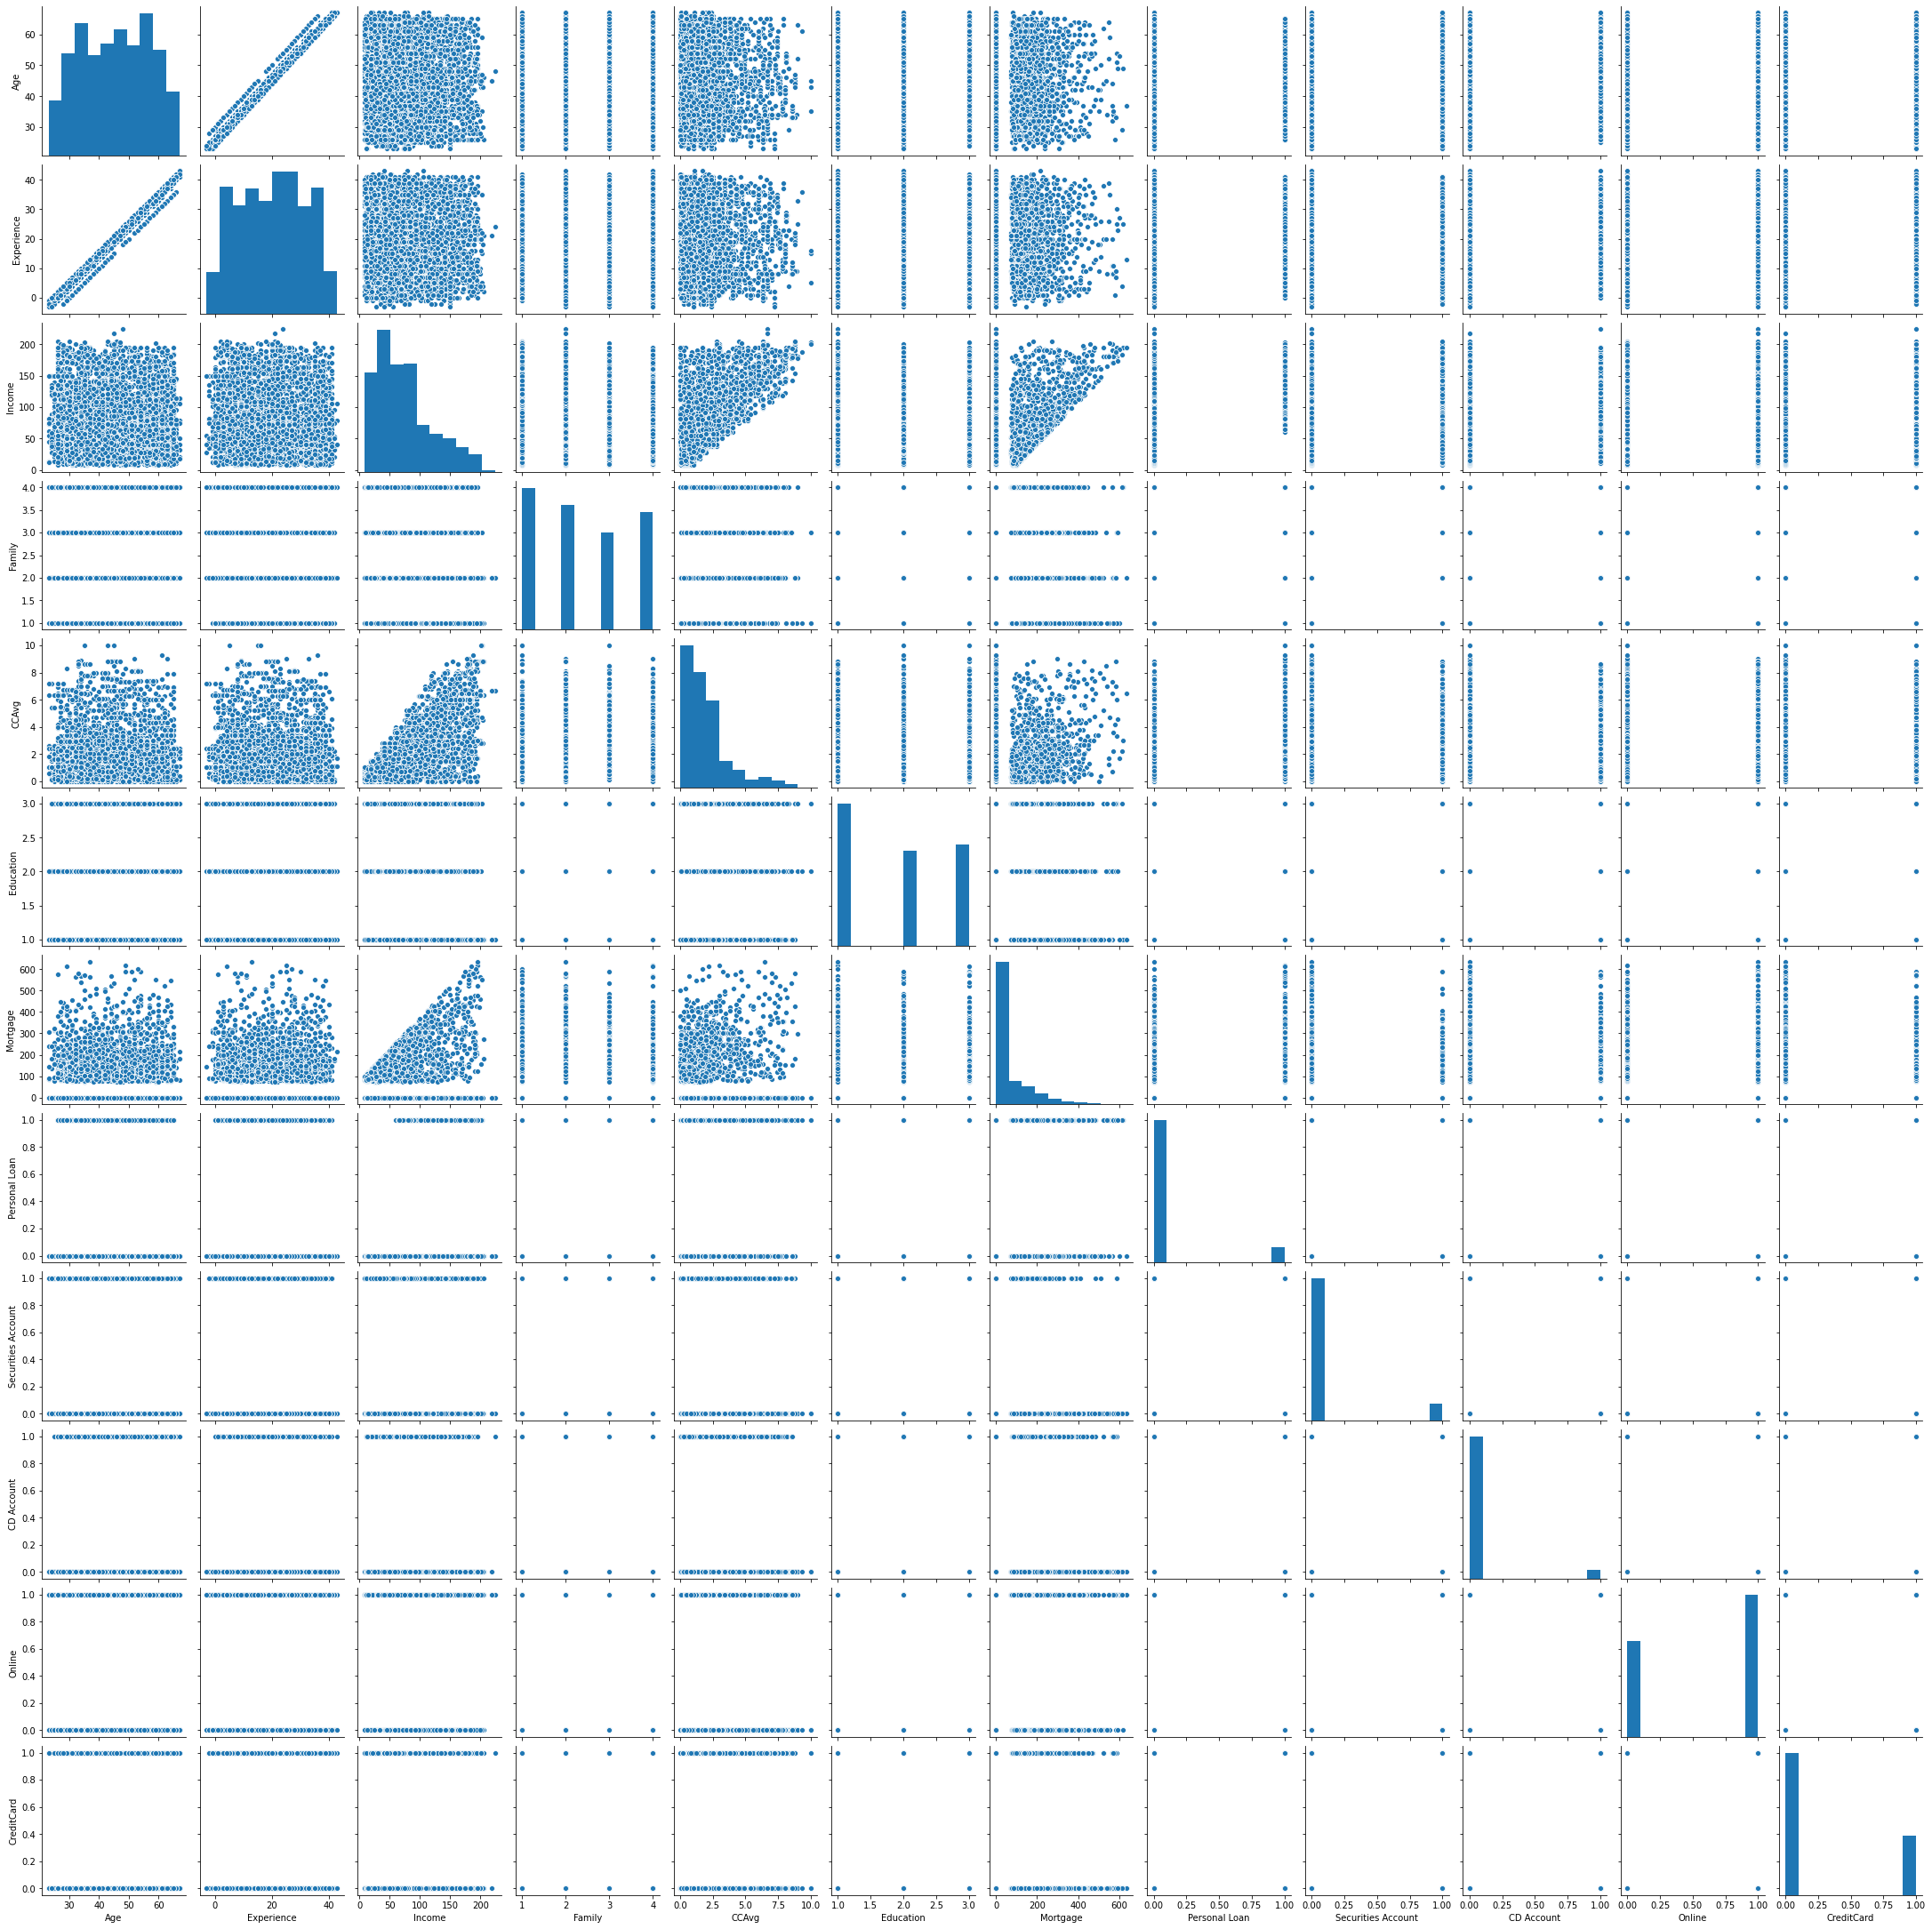

In [16]:
data1 = data.drop(["ID","ZIP Code"], axis=1)
sns.pairplot(data1)

# 2F. Get data model ready

In [23]:
X = data.drop(["Personal Loan", "ID"], axis=1)
Y = data["Personal Loan"].astype('category')

# 3. Split the data

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size = 0.3, random_state = 42 )

# 4. Use Log Reg model to predict number of customers buying personal loans

In [29]:
import statsmodels.api as sm
logit = sm.Logit( y_train, sm.add_constant( X_train ) )

lg = logit.fit()

lg.summary2()

Optimization terminated successfully.
         Current function value: 0.129289
         Iterations 9


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
===================================================================
Model:               Logit            Pseudo R-squared: 0.580      
Dependent Variable:  Personal Loan    AIC:              931.0231   
Date:                2020-06-28 16:38 BIC:              1011.1098  
No. Observations:    3500             Log-Likelihood:   -452.51    
Df Model:            12               LL-Null:          -1077.3    
Df Residuals:        3487             LLR p-value:      3.7078e-260
Converged:           1.0000           Scale:            1.0000     
No. Iterations:      9.0000                                        
-------------------------------------------------------------------
                    Coef.  Std.Err.    z    P>|z|   [0.025   0.975]
-------------------------------------------------------------------
const              -7.9221   3.3543 -2.3618 0.0182 -14.4965 -1.3478
Age                -0.0432   0.0718 -0.6013 0.5477  -0.1840  0.0976
Experience          0.0560   0.0713  0.7847 0.4326  -0.0838  0.1957
Income              0.0526   0.0031 17.1918 0.0000   0.0466  0.0586
ZIP Code           -0.0000   0.0000 -1.5200 0.1285  -0.0001  0.0000
Family              0.7006   0.0877  7.9892 0.0000   0.5288  0.8725
CCAvg               0.1198   0.0481  2.4909 0.0127   0.0255  0.2141
Education           1.6423   0.1350 12.1692 0.0000   1.3778  1.9068
Mortgage            0.0006   0.0006  0.9902 0.3221  -0.0006  0.0019
Securities Account -0.9979   0.3518 -2.8367 0.0046  -1.6873 -0.3084
CD Account          3.7102   0.3908  9.4949 0.0000   2.9444  4.4761
Online             -0.5650   0.1884 -2.9984 0.0027  -0.9343 -0.1957
CreditCard         -1.1919   0.2498 -4.7717 0.0000  -1.6815 -0.7023
===================================================================

"""

In [43]:
y_pred_df = pd.DataFrame()

y_pred_df['actual'] = y_test

y_pred_df["predicted_prob"] = lg.predict( sm.add_constant( X_test ) )
## Used statsmodel logit function to predict probaility of output being from class '1'

y_pred_df['predicted'] = y_pred_df.predicted_prob.map( lambda x: 1 if x > 0.55 else 0)

y_pred_df[0:5]

,actual,predicted_prob,predicted
1501,0,0.000154,0
2586,1,0.264580,0
2653,0,0.023512,0
1055,0,0.000114,0
705,0,0.001695,0


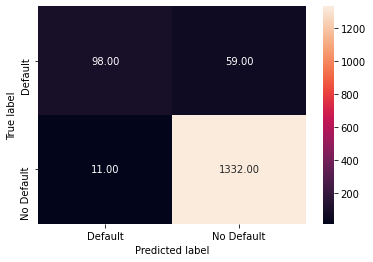

In [44]:
from sklearn.metrics import confusion_matrix,accuracy_score, precision_score, recall_score, r2_score
def draw_cm( actual, predicted ):
    cm = confusion_matrix( actual, predicted, [1,0] )
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = ["Default", "No Default"] , yticklabels = ["Default", "No Default"] )
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()
    
draw_cm( y_pred_df.actual, y_pred_df.predicted )

In [45]:
print( 'Total Accuracy : ',np.round( accuracy_score( y_test, y_pred_df.predicted ), 2 ) )
print('Precision : ' , np.round(precision_score( y_test, y_pred_df.predicted), 2 ))
print('Recall : ', np.round(recall_score( y_test, y_pred_df.predicted), 2))
print('R^2 score : ',np.round(r2_score( y_test, y_pred_df.predicted), 2) ) 

Total Accuracy :  0.95
Precision :  0.9
Recall :  0.62
R^2 score :  0.5


# 5. How can the model perform better?

By playing with the threshold (originally set to 0.6), I was able to get my recall from 0.55 to 0.65, however, my precision dropped from 0.91 to 0.84. If I continue to play with this threshold, I might be able to get an even better number overall. 

For example, setting the threshold to be 0.55, I can get my precision to 0.9 and my recall to 0.62 which might be a happier medium but it depends on the use case/outcome and which case I want to account for more. 

# 6. Give business understaning of the model

By setting our probability threshold a little higher than the 50/50 mark, we can build a model that can identify liability customers who are more likely to buy personal loans with high accuracy, precision and fairly decent recall. 


This information can be used to target these customers in order to save money and effort on marketing and finances in order to not spend wasted time on customers who have a very low possibility of ultimately buying personal loans. Banks can use information like this to help them with their Know Your Customer programs in order to deliver more tailored customer experiences. 